# Problem 1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import confusion_matrix
import pickle

In [81]:
tr= loadmat('data/digit-dataset/train.mat')
test= loadmat('data/digit-dataset/test.mat')
spam=loadmat('data/spam-dataset//spam_data.mat')

In [85]:
spam['test_data'].shape,spam['training_data'].shape,spam['training_labels'].shape,set(spam['training_labels'][0,:])

((5857, 32), (5172, 32), (1, 5172), {0, 1})

In [95]:
a=np.zeros((10,100))
len(a.flatten())

1000

551
552
553
554
555
556
557
558
559
5510


ValueError: Integer subplot specification must be a three digit number.  Not 4

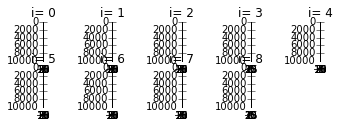

In [16]:
# plot with various axes scales
plt.figure(1)
nrow,ncol=5,5
for i in range(nrow*ncol):
    plotid=int(str(nrow)+str(ncol)+str(i+1))
    print plotid
    plt.subplot(plotid)
    plt.imshow(test['test_images'][:,:,i],cmap='gray')
    plt.title('i= %d' % i)
# plt.show()


In [3]:
tr['train_images'].shape, tr['train_labels'].shape, type(tr['train_images'][0,0,0]),type(tr['train_labels'][0][0]),2**8

((28, 28, 60000), (60000, 1), numpy.uint8, numpy.uint8, 256)

ImportError: No module named Text

test shape=  (10000, 28, 28) train shape=  (28, 28, 60000)
TRAINING IMAGES
TEST IMAGES


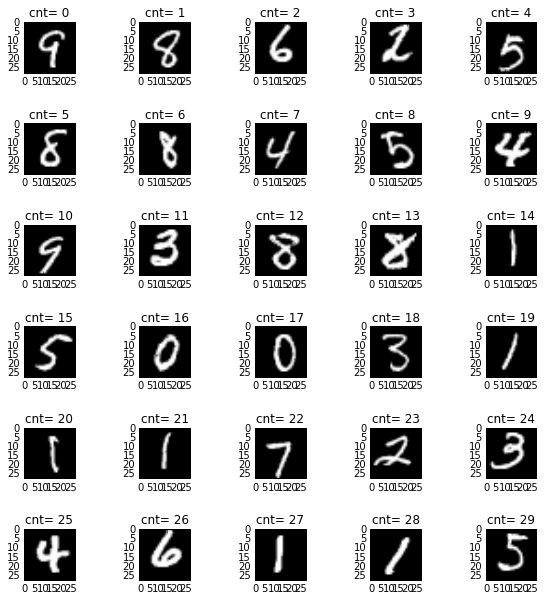

In [72]:
def multi_imshow(nrow,ncol,imgs,indices=None):
    assert(imgs.shape[0] == imgs.shape[1])
    fig,ax=plt.subplots(nrow,ncol,figsize=(10,10))
    plt.subplots_adjust(hspace=1) #wspace=1)
    cnt=0
    for r in range(nrow):
        for c in range(ncol):
            if indices is not None: ax[r,c].imshow(imgs[:,:,indices[cnt]],cmap='gray')
            else: ax[r,c].imshow(imgs[:,:,cnt],cmap='gray')
            ax[r,c].set_title('cnt= %d' % cnt)
            cnt+=1
row,col=6,5
print 'test shape= ',test['test_images'].shape,'train shape= ',tr['train_images'].shape
# multi_imshow(row,col,test['test_images'])
ind=np.arange(60000)
np.random.shuffle(ind)
print 'TRAINING IMAGES'
# multi_imshow(row,col,tr['train_images'],indices=ind[:row*col])
print 'TEST IMAGES'
a=np.swapaxes(test['test_images'],0,2)
multi_imshow(row,col,a)
plt.savefig('test.png')

In [79]:
a=np.arange(10)
np.where(a == a.max())[0][0]

9

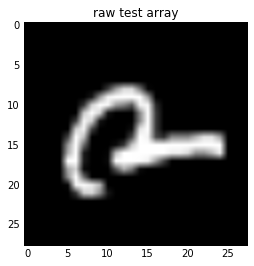

In [56]:
new_tr= np.swapaxes(np.reshape(tr['train_images'],(28*28,60000)), 1,0)
restore_tr= 

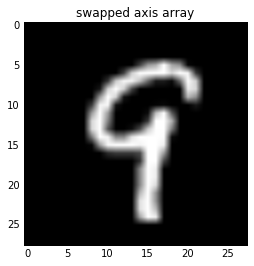

In [57]:
plt.imshow(a[:,:,0],cmap='gray')
plt.title('swapped axis array')

array([51282, 46724, 20090, ..., 53584, 59392, 10194])

(array([ 183.,  234.,  175.,  203.,  190.,  182.,  209.,  227.,  191.,  206.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

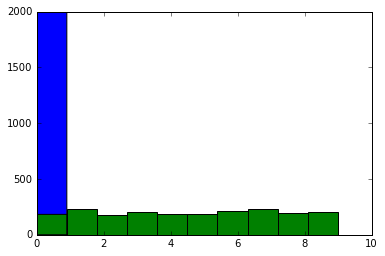

In [7]:
labs=tr['train_labels'][:,0].copy()
plt.hist(labs[:2000],range=(0,9),align='mid')
np.random.shuffle(labs)
plt.hist(labs[:2000],range=(0,9),align='mid',color='g')

train_images shape=  (60000, 784) train_labels shape=  (60000,)
size training samples=  (50000, 784) (50000,) size validation samples=  (10000, 784) (10000,)
trained on  (100, 784) out of (50000, 784) training samples, val samples =  (10000, 784)
trained on  (200, 784) out of (50000, 784) training samples, val samples =  (10000, 784)
trained on  (300, 784) out of (50000, 784) training samples, val samples =  (10000, 784)


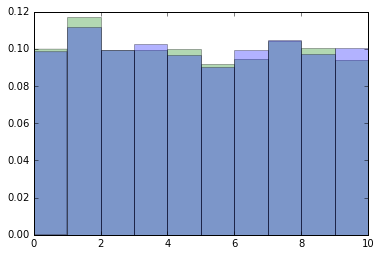

In [21]:
# n samples x d features
X=np.swapaxes(np.reshape(tr['train_images'],(28*28,60000)), axis1=1,axis2=0)   
Y=tr['train_labels'][:,0]
print "train_images shape= ",X.shape,"train_labels shape= ",Y.shape
#radomly select training and validation sets, 10000 will be validation
ind=np.arange(60000)
np.random.shuffle(ind)
n_val= 10000
ind_val, ind_tr= ind[:n_val], ind[n_val:]
Xval,Yval= X[ind_val,:],Y[ind_val]
Xtr,Ytr= X[ind_tr,:],Y[ind_tr]
print "size training samples= ",Xtr.shape,Ytr.shape,"size validation samples= ",Xval.shape,Yval.shape
#sanity check with histogram
kwargs=dict(range=(0,10),normed=True,alpha=0.3)
plt.hist(Yval,color='g',**kwargs)
plt.hist(Ytr,color='b',**kwargs)
#train on many subsets
clf={}
for n_tr in [100, 200, 300]:
    Xtr_subset,Ytr_subset= Xtr[:n_tr,:],Ytr[:n_tr] 
    #LinearSVC, liblinear
    #cl_lsvc = LinearSVC(C=1.,fit_intercept=True)
    #cl_lsvc.fit(Xtr_subset,Ytr_subset)
    #SVC linear, libsvn
    clf[str(n_tr)] = SVC(kernel='linear',C=1.) #svm.LinearSVC
    clf[str(n_tr)].fit(Xtr_subset,Ytr_subset)
    print "trained on ",Xtr_subset.shape,"out of",Xtr.shape,"training samples, val samples = ",Xval.shape

In [80]:
def kfold_cross_val(Xtr,Ytr,k=10,n_train=1000):
    n_per_k= int(n_train/float(k))
    assert(n_train <= Xtr.shape[0])
    nfeat=Xtr.shape[1]
    Xtr_use,Ytr_use= np.reshape(Xtr[:n_train,:],(k,n_per_k,nfeat)),np.reshape(Ytr[:n_train],(k,n_per_k))
    return Xtr_use,Ytr_use

Xnew,Ynew= kfold_cross_val(Xtr,Ytr)

In [136]:
def kfold_indices(k,n_train):
    '''returns array of indices of shape (k,n_train/k) to grab the k bins of training data'''
    bucket_sz=int(n_train/float(k))
    ind= np.arange(k*bucket_sz) #robust for any k, even if does not divide evenly!
    np.random.shuffle(ind) 
    return np.reshape(ind,(k,bucket_sz))

def kfold_cross_val(Xtr,Ytr,k,ntrain):
    assert(ntrain <= Xtr.shape[0])
    ind= kfold_indices(k,ntrain)
    err=np.zeros(k)-1
    for i in range(k):
        ival= ind[i,:]
        itrain=np.array(list(set(ind.flatten())-set(ival)))
        assert(len(list(set(b) | set(a))) == ntrain)
        lsvc = LinearSVC(C=1.,fit_intercept=True)
        lsvc.fit(Xtr[itrain,:],Ytr[itrain])
        pred= lsvc.predict(Xtr[ival,:])
        err[i],wrong= benchmark(pred, Ytr[ival])
    return err

k,ntrain=10,1000
err= kfold_cross_val(Xtr,Ytr,k,ntrain)

In [138]:
err.mean()


0.28800000000000003

In [132]:
ind,fullind=kfold_indices(10,1000)
a=ind[2,:]
b=np.array(list(set(ind.flatten())-set(ind[2,:])))
# i=2
# itrain=[]
# list(ind[2,:])+(list(ind[]))
# for j in range(k):
#     if j != i: itrain+= ind[j,:] 
Xtr[b,:].shape

(900, 784)

In [18]:
def benchmark(pred_labels,true_labels):
    err_rate=(pred_labels != true_labels).sum().astype(float)/len(true_labels)
    wrong= np.where(pred_labels != true_labels)[0]
    return err_rate, wrong

In [28]:
#predict
err={}
for key in clf.keys():
    pred= clf[key].predict(Xval)
    err[key],wrong= benchmark(pred,Yval)


In [50]:
min(err.keys()),max(err.keys())

('100', '300')

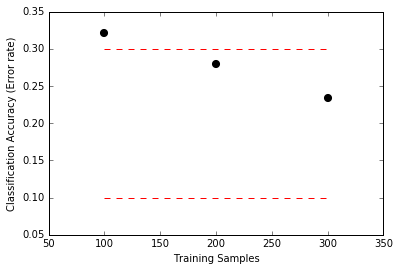

In [52]:
for k,e in err.items():
    plt.scatter(k,e,s=50,c='k')
for i in [0.3,0.1]: plt.hlines(i,float(min(err.keys())),float(max(err.keys())),colors='r',linestyles='dashed')
plt.xlabel('Training Samples')
plt.ylabel('Classification Accuracy (Error rate)')

In [54]:
pred= clf['300'].predict(Xval)

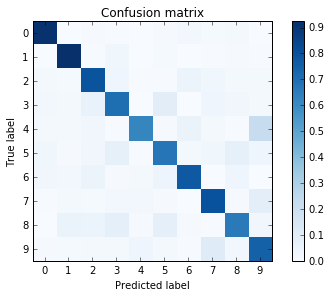

In [65]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks.astype(str))
    plt.yticks(tick_marks, tick_marks.astype(str))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm=confusion_matrix(Yval,pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized)

In [3]:
SVC?

In [2]:
pickle.dump?

In [5]:
a=np.zeros(100)

In [13]:
b=pd.DataFrame(a)
b.to_csv('test.csv',header='prediction')

In [11]:
b.to_csv?

In [17]:
b.shape

(100, 1)

In [19]:
a='../../MLcs289a/hw1/benchmark.m'

In [20]:
import os

In [21]:
os.path.dirname(a)

'../../MLcs289a/hw1'